In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=0)

In [4]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=0)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred_dtc)
print('Decision Tree Classifier Accuracy:', dtc_acc)

Decision Tree Classifier Accuracy: 0.9994616293903538


In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print('Neural Network Classifier Accuracy:', mlp_acc)

Neural Network Classifier Accuracy: 0.9982912584998186


In [7]:
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

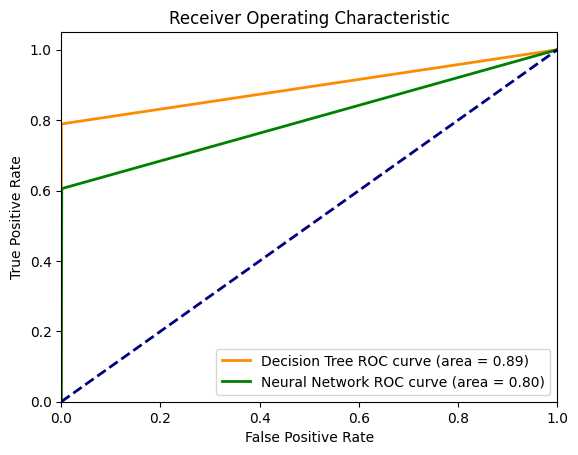

In [8]:
plt.figure()
lw = 2
plt.plot(fpr_dtc, tpr_dtc, color='darkorange',
         lw=lw, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_mlp, tpr_mlp, color='green',
         lw=lw, label='Neural Network ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()